<a href="https://colab.research.google.com/github/kuanhoong/mlr3/blob/main/demo/Introduction_to_mlr3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning with mlr3

![](https://mlr3.mlr-org.com/reference/figures/mlr3verse.svg)

[mlr3](https://mlr3.mlr-org.com/) is an R package that makes machine learning easier. It provides a unified interface to existing machine learning algorithms and makes it easy to experiment with different models. mlr3 also provides a number of features that make it easier to evaluate and compare different models.

# Resource
- [slides](https://docs.google.com/presentation/d/1fUIBp-oZ8cygwnNzUH7Y7jk2s_ZhshswcsANuMpImFA/edit?usp=sharing)
- [Github](https://github.com/kuanhoong/mlr3)

## Installation

- Install [R](https://cran.r-project.org/mirrors.html) from here.
- Install [RStudio](https://www.rstudio.com/products/rstudio/download/) from here.
- Follow kuanhoong's github repo [here](https://github.com/kuanhoong/mlr3) to test your set-up (note: it is not necessary to establish communication between Kaggle and Github for this session).
- Install all the packages in the mlr3 by running `install.packages("mlr3")` and `install.packages("mlr3verse")` in Kaggle/Google Colab notebook.

In [14]:
install.packages("mlr3")
install.packages("mlr3verse")
library(mlr3)
library(mlr3verse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’, ‘gridExtra’, ‘clue’, ‘fpc’, ‘viridis’, ‘bbotk’, ‘mlr3cluster’, ‘mlr3data’, ‘mlr3filters’, ‘mlr3fselect’, ‘mlr3hyperband’, ‘mlr3learners’, ‘mlr3mbo’, ‘mlr3pipelines’, ‘mlr3tuning’, ‘mlr3tuningspaces’, ‘mlr3viz’




## Example 1: Iris

In [15]:
print(iris) ##included in R

    Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
1            5.1         3.5          1.4         0.2     setosa
2            4.9         3.0          1.4         0.2     setosa
3            4.7         3.2          1.3         0.2     setosa
4            4.6         3.1          1.5         0.2     setosa
5            5.0         3.6          1.4         0.2     setosa
6            5.4         3.9          1.7         0.4     setosa
7            4.6         3.4          1.4         0.3     setosa
8            5.0         3.4          1.5         0.2     setosa
9            4.4         2.9          1.4         0.2     setosa
10           4.9         3.1          1.5         0.1     setosa
11           5.4         3.7          1.5         0.2     setosa
12           4.8         3.4          1.6         0.2     setosa
13           4.8         3.0          1.4         0.1     setosa
14           4.3         3.0          1.1         0.1     setosa
15           5.8         

## Constructing Learners and Tasks

In [16]:
task = TaskClassif$new("iris", iris, "Species")

In [17]:
task

<TaskClassif:iris> (150 x 5)
* Target: Species
* Properties: multiclass
* Features (4):
  - dbl (4): Petal.Length, Petal.Width, Sepal.Length, Sepal.Width

In [18]:
task$nrow

[1] 150

In [19]:
task$ncol

[1] 5

## Basic train + predict

In [27]:
learner = lrn("classif.rpart")

In [28]:
## train 
learner$train(task)

In [29]:
print(learner$model)

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *


In [30]:
## check hyperparameters
as.data.table(learner$param_set)

id,class,lower,upper,levels,nlevels,is_bounded,special_vals,default,storage_type,tags
<chr>,<chr>,<dbl>,<dbl>,<list>,<dbl>,<lgl>,<list>,<list>,<chr>,<list>
cp,ParamDbl,0,1,NULL,Inf,TRUE,NULL,0.01,numeric,train
keep_model,ParamLgl,NA,NA,"TRUE, FALSE",2,TRUE,NULL,FALSE,logical,train
maxcompete,ParamInt,0,Inf,NULL,Inf,FALSE,NULL,4,integer,train
maxdepth,ParamInt,1,30,NULL,30,TRUE,NULL,30,integer,train
maxsurrogate,ParamInt,0,Inf,NULL,Inf,FALSE,NULL,5,integer,train
minbucket,ParamInt,1,Inf,NULL,Inf,FALSE,NULL,<environment: 0x556dcab2c490>,integer,train
minsplit,ParamInt,1,Inf,NULL,Inf,FALSE,NULL,20,integer,train
surrogatestyle,ParamInt,0,1,NULL,2,TRUE,NULL,0,integer,train
usesurrogate,ParamInt,0,2,NULL,3,TRUE,NULL,2,integer,train


In [37]:
## change learner behaviour
learner$param_set$values = list(maxdepth = 1, xval = 0)

In [38]:
## train 
learner$train(task)

In [39]:
print(learner$model)

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.3333333 0.3333333 0.3333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.0000000 0.0000000 0.0000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.0000000 0.5000000 0.5000000) *


In [42]:
install.packages("data.table")
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [43]:
## create new_data
new_data = data.table("Sepal.Length"=c(4,2), "Sepal.Width"=c(3,2), "Petal.Length"=c(2,3), "Petal.Width" =c(1,2))
new_data


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
4,3,2,1
2,2,3,2


In [44]:
## prediction

prediction = learner$predict_newdata(new_data)
prediction

<PredictionClassif> for 2 observations:
 row_ids truth   response
       1  <NA>     setosa
       2  <NA> versicolor

In [45]:
## change prediction type
learner$predict_type = "prob"
prediction = learner$predict_newdata(new_data)
prediction

<PredictionClassif> for 2 observations:
 row_ids truth   response prob.setosa prob.versicolor prob.virginica
       1  <NA>     setosa           1             0.0            0.0
       2  <NA> versicolor           0             0.5            0.5

In [46]:
## view prediction object by using data.table

as.data.table(prediction)

row_ids,truth,response,prob.setosa,prob.versicolor,prob.virginica
<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,NA,setosa,1,0.0,0.0
2,NA,versicolor,0,0.5,0.5


In [47]:
prediction$response

[1] setosa     versicolor
Levels: setosa versicolor virginica

## Example 2: Penguins

In [51]:
# create learning task
task_penguins = as_task_classif(species ~ ., data = palmerpenguins::penguins)
task_penguins

<TaskClassif:palmerpenguins::penguins> (344 x 8)
* Target: species
* Properties: multiclass
* Features (7):
  - int (3): body_mass_g, flipper_length_mm, year
  - dbl (2): bill_depth_mm, bill_length_mm
  - fct (2): island, sex

In [52]:
# load learner and set hyperparameter
learner = lrn("classif.rpart", cp = .01)

In [53]:
# train/test split
split = partition(task_penguins, ratio = 0.67)

# train the model
learner$train(task_penguins, split$train_set)

# predict data
prediction = learner$predict(task_penguins, split$test_set)

# calculate performance
prediction$confusion

           truth
response    Adelie Chinstrap Gentoo
  Adelie       146         5      0
  Chinstrap      6        63      1
  Gentoo         0         0    123

measure the model performance

In [54]:
measure = msr("classif.acc")
prediction$score(measure)

classif.acc 
  0.9651163

# Resample

In [55]:
# 3-fold cross validation
resampling = rsmp("cv", folds = 3L)

# run experiments
rr = resample(task_penguins, learner, resampling)

# access results
rr$score(measure)[, .(task_id, learner_id, iteration, classif.acc)]

INFO  [02:32:17.913] [mlr3] Applying learner 'classif.rpart' on task 'palmerpenguins::penguins' (iter 1/3)
INFO  [02:32:17.942] [mlr3] Applying learner 'classif.rpart' on task 'palmerpenguins::penguins' (iter 2/3)
INFO  [02:32:17.970] [mlr3] Applying learner 'classif.rpart' on task 'palmerpenguins::penguins' (iter 3/3)


task_id,learner_id,iteration,classif.acc
<chr>,<chr>,<int>,<dbl>
palmerpenguins::penguins,classif.rpart,1,0.9478261
palmerpenguins::penguins,classif.rpart,2,0.9391304
palmerpenguins::penguins,classif.rpart,3,0.8859649


# Example 3

Regression with mtcars data


In [ ]:
install.packages("ranger")
library(ranger)

In [58]:
library(mlr3verse)

### Create Task ---------------------------------------------------------------#
data("mtcars", package = "datasets")
task_mtcars = as_task_regr(mtcars, target = "mpg", id = "cars")

In [59]:
task_mtcars
task_mtcars$feature_names
task_mtcars$target_names

<TaskRegr:cars> (32 x 11)
* Target: mpg
* Properties: -
* Features (10):
  - dbl (10): am, carb, cyl, disp, drat, gear, hp, qsec, vs, wt

[1] "am"   "carb" "cyl"  "disp" "drat" "gear" "hp"   "qsec" "vs"   "wt"

[1] "mpg"

In [60]:
### Create Learner ------------------------------------------------------------#
lrn_rf = lrn("regr.ranger")
lrn_rf

<LearnerRegrRanger:regr.ranger>
* Model: -
* Parameters: num.threads=1
* Packages: mlr3, mlr3learners, ranger
* Predict Types:  [response], se
* Feature Types: logical, integer, numeric, character, factor, ordered
* Properties: hotstart_backward, importance, oob_error, weights

In [61]:
lrn_rf$param_set
lrn_rf$model

<ParamSet>
                              id    class lower upper nlevels        default
 1:                        alpha ParamDbl  -Inf   Inf     Inf            0.5
 2:       always.split.variables ParamUty    NA    NA     Inf <NoDefault[3]>
 3:                      holdout ParamLgl    NA    NA       2          FALSE
 4:                   importance ParamFct    NA    NA       4 <NoDefault[3]>
 5:                   keep.inbag ParamLgl    NA    NA       2          FALSE
 6:                    max.depth ParamInt     0   Inf     Inf               
 7:                min.node.size ParamInt     1   Inf     Inf              5
 8:                     min.prop ParamDbl  -Inf   Inf     Inf            0.1
 9:                      minprop ParamDbl  -Inf   Inf     Inf            0.1
10:                         mtry ParamInt     1   Inf     Inf <NoDefault[3]>
11:                   mtry.ratio ParamDbl     0     1     Inf <NoDefault[3]>
12:            num.random.splits ParamInt     1   Inf     Inf    

NULL

In [68]:
# train/test split
split = partition(task_mtcars, ratio = 0.67)

# train the model
lrn_rf$train(task_mtcars, split$train_set)

# predict data
prediction = lrn_rf$predict(task_mtcars, split$test_set)

# prediction results
prediction$response

[1] 20.82266 20.82983 24.31849 20.31175 17.67948 19.09201 14.63223 23.75782
 [9] 22.68509 18.82597 18.82826 16.39496 16.39529 15.82788 11.86600 11.51134
[17] 13.71198 30.01850 30.36331 31.11510 22.61051 16.01738 16.74093 14.55180
[25] 17.67971 29.42657 26.18938 28.05085 16.24167 19.91925 15.07532 22.56474

In [66]:
# Inspect predictions
head(data.frame(
id = 1:length(prediction$truth),
truth = prediction$truth,
response = prediction$response))

,id,truth,response
,<int>,<dbl>,<dbl>
1,1,21.0,20.71356
2,2,21.0,20.70552
3,3,22.8,23.97322
4,4,21.4,20.18868
5,5,18.7,17.64939
6,6,18.1,18.77280


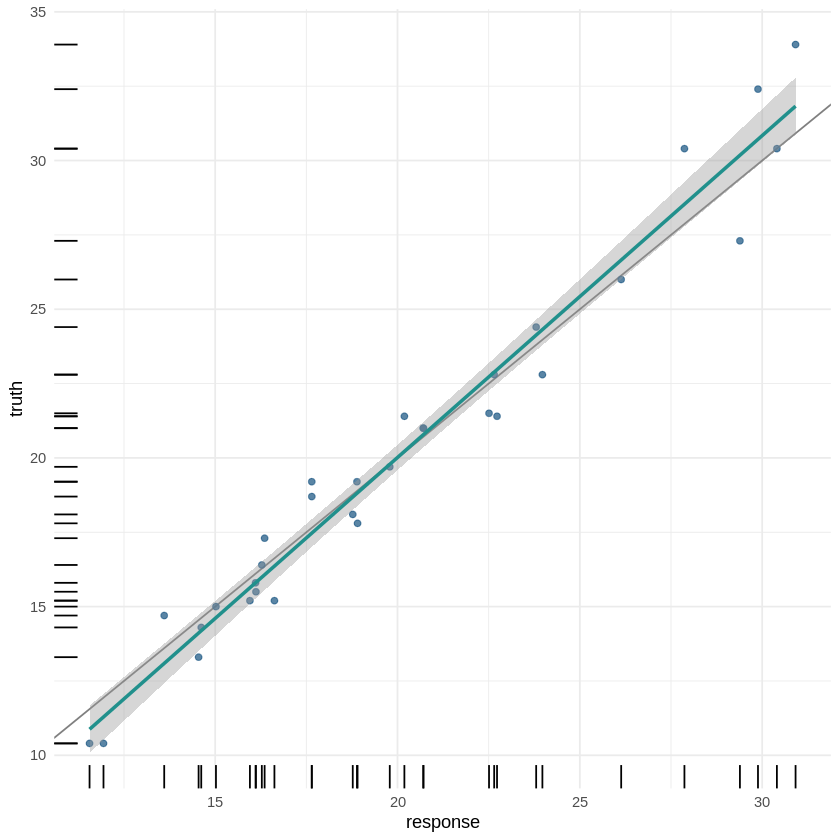

In [67]:
library(mlr3viz)
# Get nice visualization with a one-liner
mlr3viz::autoplot(prediction)

In [70]:
# Define MAE metric
mae <- mlr3::msr("regr.mae")
# Assess performance (MSE by default)
prediction$score()


regr.mse 
1.429585

In [71]:
prediction$score(mae)

regr.mae 
0.9459832

# Conclusion

In this webinar, you learned about mlr3 which is a powerful R package that makes machine learning easier. It provides a unified interface to existing machine learning algorithms and makes it easy to experiment with different models. mlr3 also provides a number of features that make it easier to evaluate and compare different models.

# Resources

- [mlr3 website](https://mlr3.mlr-org.com/)
- [Flexible and Robust Machine Learning Using mlr3 in R (ebook)](https://mlr3book.mlr-org.com/)
- [Exploring the World of Machine Learning with mlr3 in R](https://medium.com/@moonchangin/introduction-to-machine-learning-in-r-mlr3-e3229b97d422)
- [Building ML models using mlr3 ](https://medium.com/@natalie.a.foss/building-ml-models-using-mlr3-b91c9b26a9a3)
- [mlr3 cheatsheets](https://cheatsheets.mlr-org.com/)
- [Introduction to Machine Learning (I2ML)](https://slds-lmu.github.io/i2ml/)

# About Me

## Poo Kuan Hoong, Ph.D
Connect with me:
- [Twitter](https://twitter.com/kuanhoong)
- [LinkedIn](https://www.linkedin.com/in/kuanhoong/)
- [GitHub](https://github.com/kuanhoong/)